In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain  # This is the Louvain Algorithm

In [3]:
G = nx.Graph()

# Creating 3 clusters of friends
# Group 1: Tech Friends
tech_edges = [(1,2), (2,3), (3,1), (3,4), (4,5), (5,1), (1,6), (6,2)]
# Group 2: Sports Friends
sports_edges = [(10,11), (11,12), (12,13), (13,10), (10,14), (14,15), (15,11)]
# Group 3: Art Friends
art_edges = [(20,21), (21,22), (22,23), (23,20), (20,24), (24,25), (25,21)]

# Bridge Connections (People who know people in other groups)
bridges = [(5, 10), (13, 20), (1, 25)]

G.add_edges_from(tech_edges + sports_edges + art_edges + bridges)
print(f"Graph created with {G.number_of_nodes()} users and {G.number_of_edges()} friendships.")

Graph created with 18 users and 25 friendships.


In [4]:
# Apply Louvain
partition = community_louvain.best_partition(G)

# Calculate Modularity (How good the grouping is)
modularity = community_louvain.modularity(partition, G)
print(f"Algorithm complete. Modularity Score: {modularity:.4f}")

Algorithm complete. Modularity Score: 0.5456


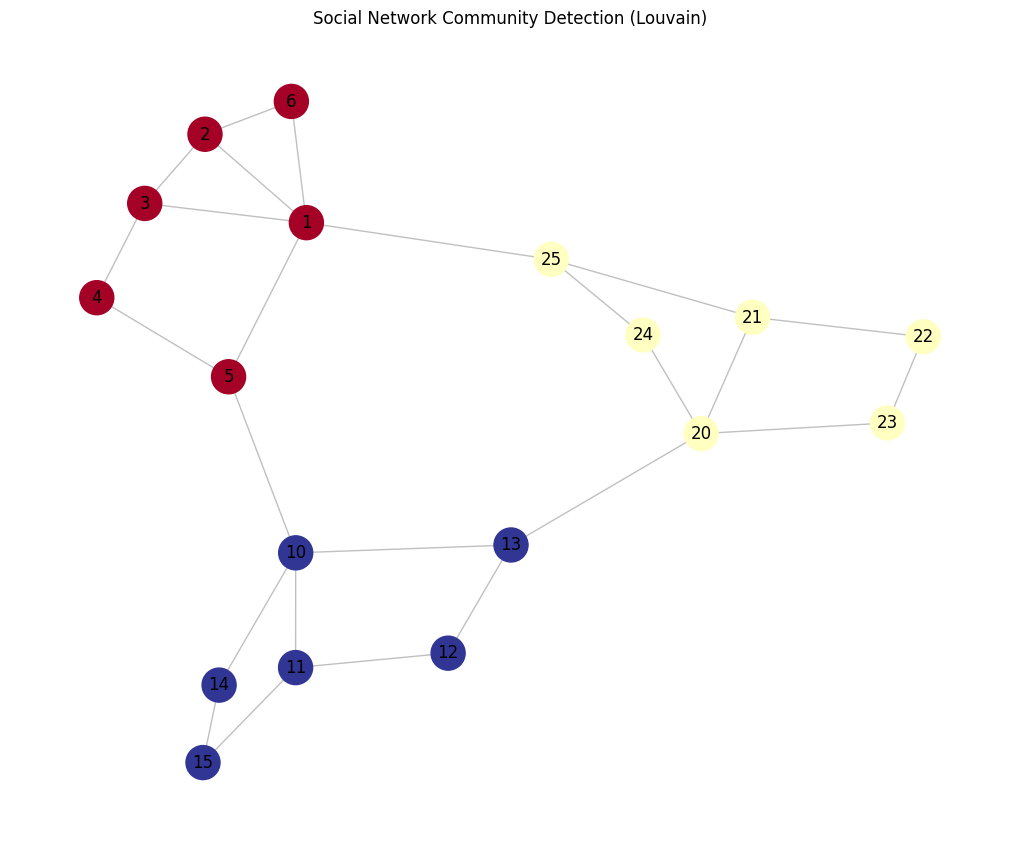

In [6]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42) # Keeps the layout consistent

# Color nodes based on their community ID
colors = [partition[node] for node in G.nodes()]

nx.draw(G, pos, node_color=colors, with_labels=True, 
        cmap=plt.cm.RdYlBu, node_size=600, edge_color='silver')

plt.title("Social Network Community Detection (Louvain)")
plt.show()